# <u>Data Science Essentials</u>

## <u>Topic</u>: Correlation of Categorical Features

## <u>Category</u>: Data Visualization

### <u>Created By</u>: Mohammed Misbahullah Sheriff
- [LinkedIn](https://www.linkedin.com/in/mohammed-misbahullah-sheriff/)
- [GitHub](https://github.com/MisbahullahSheriff)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Getting the Data

In [2]:
path = "/content/car-details.csv"

df = pd.read_csv(path).dropna()
print("Data Shape:", df.shape)
df.head()

Data Shape: (6717, 16)


,name,company,model,edition,year,owner,fuel,seller_type,transmission,km_driven,mileage_mpg,engine_cc,max_power_bhp,torque_nm,seats,selling_price
0,Maruti Swift Dzire VDI,Maruti,Swift,Dzire VDI,2014,First,Diesel,Individual,Manual,145500,55.00,1248.0,74.00,190.000000,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,Skoda,Rapid,1.5 TDI Ambition,2014,Second,Diesel,Individual,Manual,120000,49.70,1498.0,103.52,250.000000,5.0,370000
2,Honda City 2017-2020 EXi,Honda,City,2017-2020 EXi,2006,Third,Petrol,Individual,Manual,140000,41.60,1497.0,78.00,124.544455,5.0,158000
3,Hyundai i20 Sportz Diesel,Hyundai,i20,Sportz Diesel,2010,First,Diesel,Individual,Manual,127000,54.06,1396.0,90.00,219.668960,5.0,225000
4,Maruti Swift VXI BSIII,Maruti,Swift,VXI BSIII,2007,First,Petrol,Individual,Manual,120000,37.84,1298.0,88.20,112.776475,5.0,130000


## Demo

In [12]:
def get_cramers_v(var1, var2):
  """

  Description:
  ------------
  This function will return the Cramer's V value between 2 given categorical features

  Parameters:
  -----------
  var1: array or series
        Values of the first categorical feature

  var2: array or series
        Values of the second categorical feature

  """
  cross_tab = pd.crosstab(var1, var2)
  r, c = cross_tab.shape
  n = cross_tab.sum().sum()
  chi2 = stats.chi2_contingency(cross_tab).statistic
  phi2 = chi2 / n

  # bias correction
  phi2_ = max(0, phi2 - ((r - 1) * (c - 1) / (n - 1)))
  r_ = r -( ((r - 1) ** 2) / (n - 1))
  c_ = c -( ((c - 1) ** 2) / (n - 1))

  return np.sqrt(phi2_ / min(r_ - 1, c_ - 1))

In [34]:
def get_cramers_matrix(data):
  """

  Description:
  ------------
  This function will return the Cramer's V matrix between the given columns

  Parameters:
  -----------
  data: dataframe
        The dataset for which to calculate Cramer's V between categorical columns in a pairwise manner

  """
  cols = (data
            .select_dtypes(exclude="number")
            .columns)

  cm = (pd
        .DataFrame(index=cols)
        .assign(**{
            f"{col}": np.ones_like(cols) for col in cols
        }))

  for col1 in cols:
    for col2 in cols:
      if col1 == col2:
        continue
      cm.loc[col1, col2] = get_cramers_v(data[col1], data[col2])

  return cm.astype("float")

In [35]:
cm = get_cramers_matrix(df.drop(columns=["name", "edition"]))
cm

,company,model,owner,fuel,seller_type,transmission
company,1.000000,0.971317,0.124172,0.265858,0.178152,0.504726
model,0.971317,1.000000,0.297728,0.464841,0.280494,0.567123
owner,0.124172,0.297728,1.000000,0.022573,0.134078,0.111323
fuel,0.265858,0.464841,0.022573,1.000000,0.046447,0.035900
seller_type,0.178152,0.280494,0.134078,0.046447,1.000000,0.213667
transmission,0.504726,0.567123,0.111323,0.035900,0.213667,1.000000


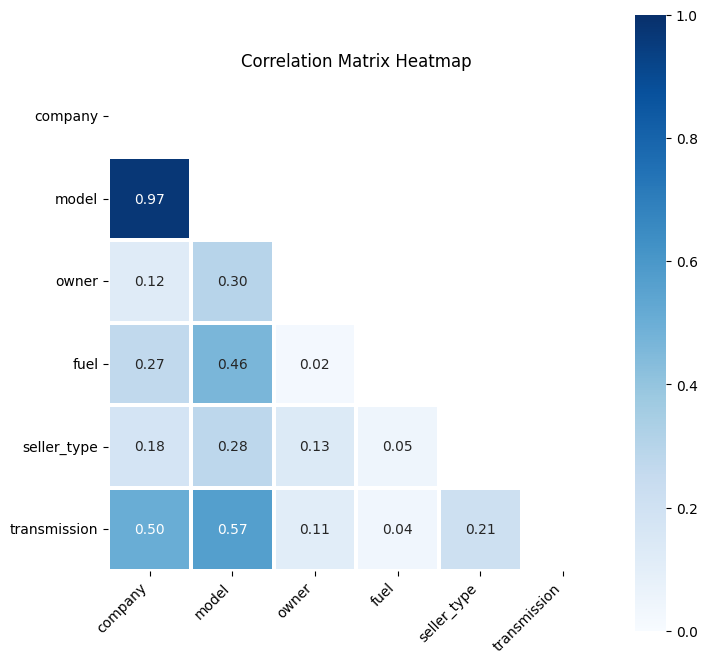

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))

mask = np.zeros_like(cm, dtype=bool)
mask[np.triu_indices_from(mask)] = True

hm = sns.heatmap(
    data=cm,
    vmin=0,
    vmax=1,
    cmap="Blues",
    annot=True,
    fmt=".2f",
    linewidths=1.5,
    linecolor="white",
    cbar=True,
    square=True,
    mask=mask,
    ax=ax
)

hm.set_xticklabels(hm.get_xticklabels(),
                   rotation=45,
                   ha="right")

hm.set_yticklabels(hm.get_yticklabels(),
                   rotation=0)

hm.set_title("Correlation Matrix Heatmap")

plt.show()

### Observations:

- The following feature pairs show appreciably high correlation:
  - model and company
  - transmission and company
  - model and transmission
  - fuel and model